In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("iowa_train.csv")
test = pd.read_csv("iowa_test.csv")

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
# We'll drop the "Id" column from the datasets because they'll have nothing to do with the models
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [5]:
train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

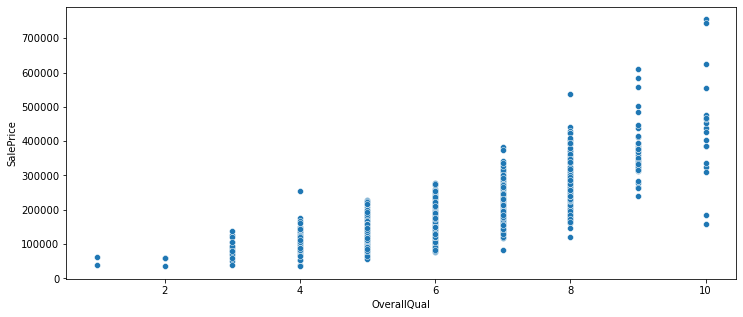

In [6]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = "OverallQual", y = "SalePrice", data = train)
# Overall quality is linearly related to Sale Price

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

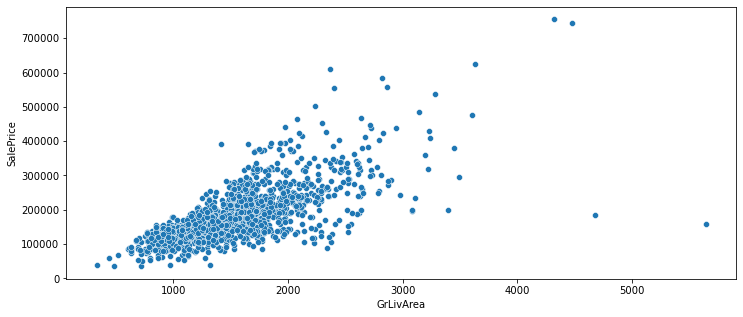

In [7]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = "GrLivArea", y = "SalePrice", data = train)
# A couple of outliers here. We'll drop those.

In [8]:
drop_outlier = train[(train['GrLivArea'] > 4000)].index

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

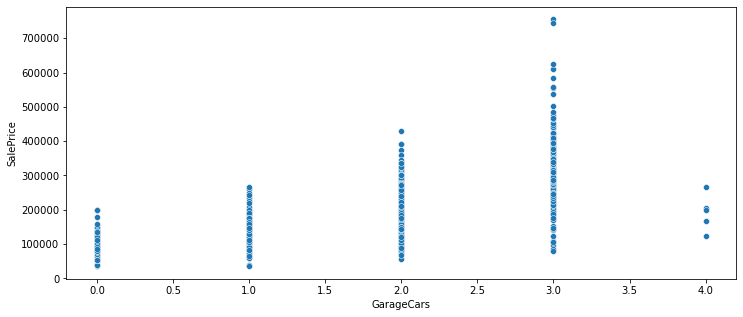

In [9]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = "GarageCars", y = "SalePrice", data = train)
# Linearly related to Sale Price

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

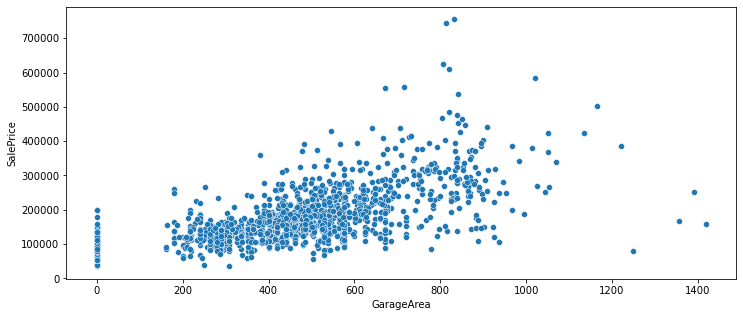

In [10]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = "GarageArea", y = "SalePrice", data = train)
# A few outliers here.

In [11]:
drop_outlier = train[(train['GarageArea'] > 1200)].index

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

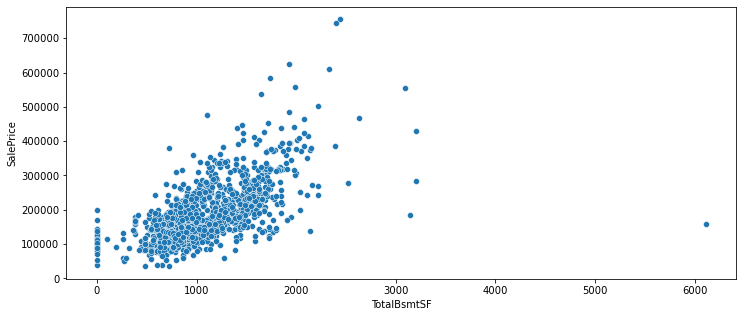

In [12]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = "TotalBsmtSF", y = "SalePrice", data = train)
# A few outliers here.

In [13]:
drop_outlier = train[(train['TotalBsmtSF'] > 4000)].index

In [14]:
train=train.drop(drop_outlier, axis=0)

In [15]:
train.to_csv("outlier_housing.csv", index = False)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

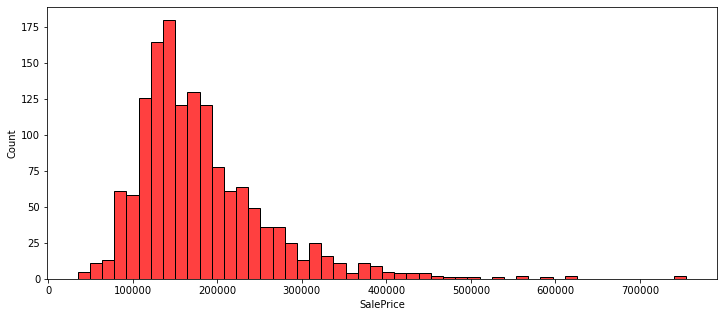

In [16]:
# let's take a look at the target variable "SalePrice"
plt.figure(figsize = (12, 5))
sns.histplot(train["SalePrice"], bins = 50, color = "red")
# The SalePrice values are skewed as you go to the right

In [19]:
x = pd.read_csv("outlier_housing.csv")

In [20]:
x_na = (x.isnull().sum() / len(x)) * 100
x_na = x_na.drop(x_na[x_na == 0].index).sort_values(ascending=False)[:30]
x_missing = pd.DataFrame({'Missing Ratio' :x_na})
x_missing.head(10)

,Missing Ratio
PoolQC,99.588759
MiscFeature,96.298835
Alley,93.762851
Fence,80.740233
FireplaceQu,47.292666
LotFrontage,17.751885
GarageType,5.551748
GarageYrBlt,5.551748
GarageFinish,5.551748
GarageQual,5.551748


Text(0.5, 1.0, 'Percent missing data by category')

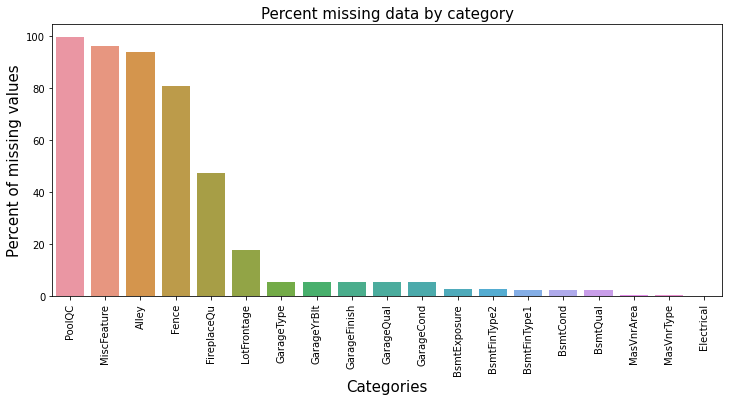

In [21]:
f, ax = plt.subplots(figsize=(12, 5))
plt.xticks(rotation='90')
sns.barplot(x=x_na.index, y=x_na)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by category', fontsize=15)

In [22]:
print(x.shape)

(1459, 80)


In [23]:
x.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [24]:
x.describe(include = "all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1459.000000,1459,1200.000000,1459.000000,1459,91,1459,1459,1459,1459,...,1459.000000,6,281,54,1459.000000,1459.000000,1459.000000,1459,1459,1459.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1150,NaN,NaN,1453,50,925,1311,1458,1052,...,NaN,2,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.895134,NaN,69.847500,10480.248115,NaN,NaN,NaN,NaN,NaN,NaN,...,2.431803,NaN,NaN,NaN,43.518849,6.325565,2007.815627,NaN,NaN,180935.535298
std,42.314997,NaN,23.258799,9886.304813,NaN,NaN,NaN,NaN,NaN,NaN,...,38.196894,NaN,NaN,NaN,496.291826,2.700957,1.328542,NaN,NaN,79467.851763
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7549.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129950.000000
50%,50.000000,NaN,69.000000,9477.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11600.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [25]:
x.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [26]:
# MoSold, YrSold, SaleType and SaleCondition will be irrelevant to the price of a new house, so we'll drop those columns
# PoolQC,Alley, MiscFeature and Fence variables have too many missing columns, so we'll drop those as well
x.drop(columns = ["MoSold", "YrSold", "SaleType", "SaleCondition", "PoolQC", "Alley", "MiscFeature", "Fence"], 
       axis = 1, inplace = True)

In [27]:
# We need to separate the numerical columns from the categorical columns and find missing values
num_col = [col for col in x.columns if x[col].dtype in ['int64', 'float64']]
null_cols = x[num_col].isnull().sum()
print(null_cols[null_cols > 0])
# Not too many missing observations now

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [28]:
# Separate the categorical columns from the numerical and find missing values
cat_cols = [col for col in x.columns if x[col].dtype == 'object']
cat_null_cols = x[cat_cols].isnull().sum()
print(cat_null_cols[cat_null_cols > 0])
# Not too many missing observations here, either

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

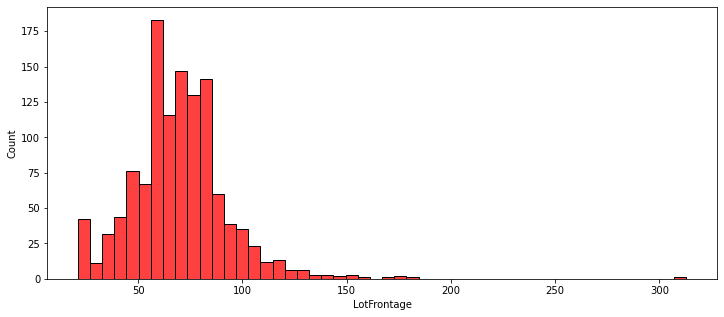

In [29]:
# Let's make some plots of these columns with null values so we can find the best way to fill those
# values in the columns
plt.figure(figsize = (12,5))
sns.histplot(x["LotFrontage"], bins = 50, color = "red")
# Since most of the values fall within the median range, we'll use the median of the variable to fill those values
# The variable also has one or two outliers, so we'll remove those

In [30]:
x.LotFrontage = x.LotFrontage.fillna(x.LotFrontage.median())

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

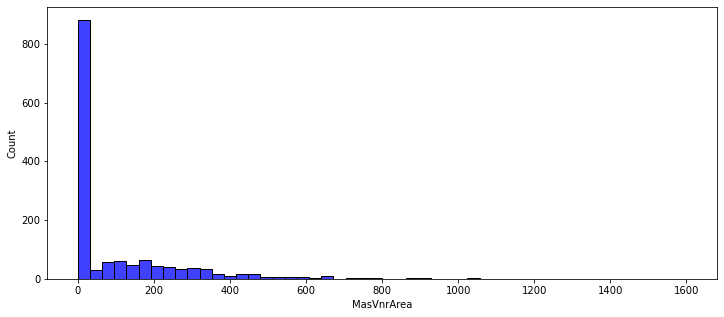

In [31]:
plt.figure(figsize = (12,5))
sns.histplot(x["MasVnrArea"], bins = 50, color = "blue")
# Most of the values are around 0, so we'll replace the missing values with 0

In [32]:
x["MasVnrArea"] = x["MasVnrArea"].fillna(0)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

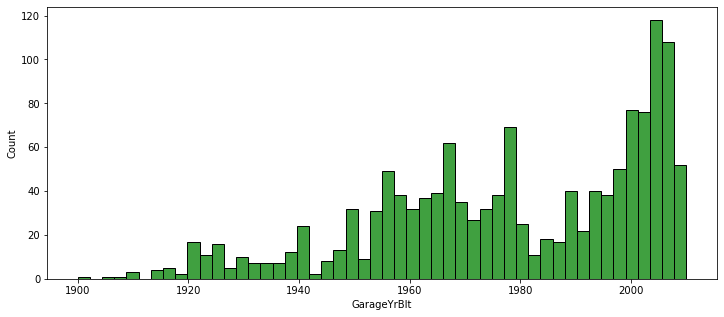

In [33]:
plt.figure(figsize = (12,5))
sns.histplot(x["GarageYrBlt"], bins = 50, color = "green")
# We'll replace the missing values here with the year the house was built

In [34]:
x.GarageYrBlt = x.GarageYrBlt.fillna(x.YearBuilt)

In [35]:
new_null_cols = x[num_col].isnull().sum()
print(new_null_cols)
# Great. Now we have no missing values in the numerical side if the data

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64


In [36]:
# Let's take another look at the categorical side of the data
cat_null_cols = x[cat_cols].isnull().sum()
print(cat_null_cols[cat_null_cols > 0])

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


<AxesSubplot:xlabel='MasVnrType', ylabel='Count'>

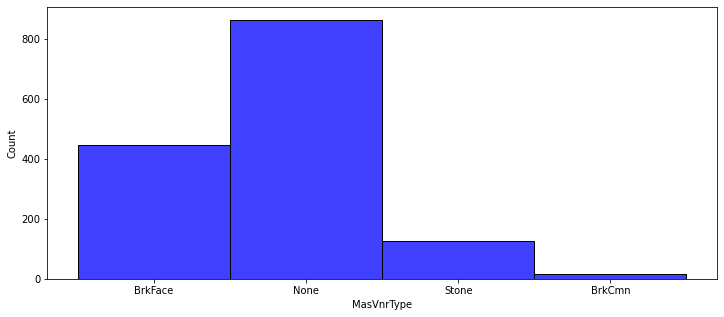

In [37]:
plt.figure(figsize = (12,5))
sns.histplot(x["MasVnrType"], bins = 50, color = "blue")

In [38]:
x["MasVnrType"] = x["MasVnrType"].fillna("None")

<AxesSubplot:xlabel='BsmtQual', ylabel='Count'>

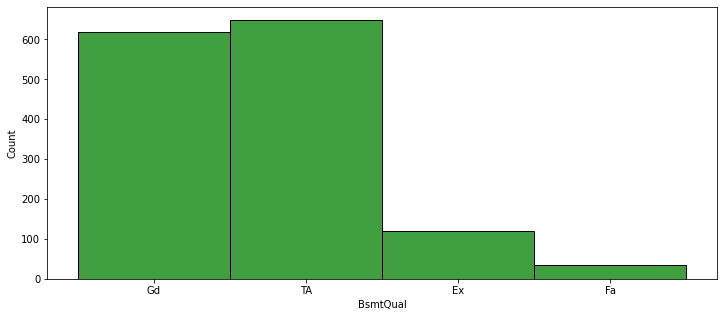

In [39]:
plt.figure(figsize = (12,5))
sns.histplot(x["BsmtQual"], bins = 50, color = "green")

In [40]:
x.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [41]:
x["BsmtQual"] = x["BsmtQual"].fillna("None")

<AxesSubplot:xlabel='BsmtCond', ylabel='Count'>

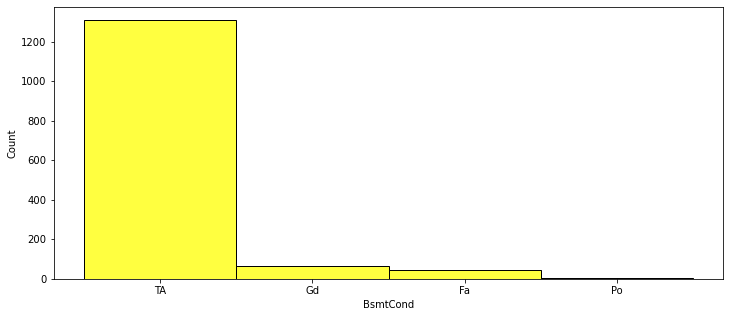

In [42]:
plt.figure(figsize = (12,5))
sns.histplot(x["BsmtCond"], bins = 50, color = "yellow")

In [43]:
x["BsmtCond"] = x["BsmtCond"].fillna("None")

<AxesSubplot:xlabel='BsmtExposure', ylabel='Count'>

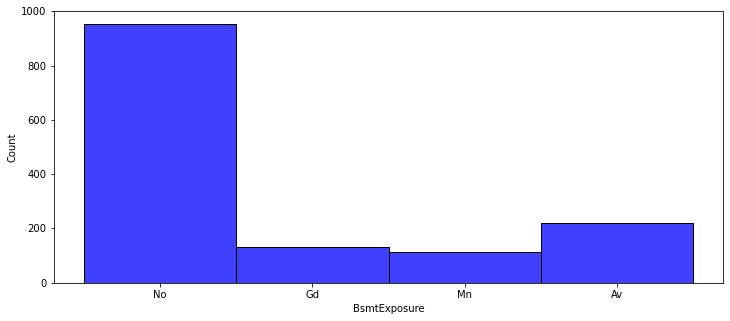

In [44]:
plt.figure(figsize = (12,5))
sns.histplot(x["BsmtExposure"], bins = 50, color = "blue")

In [45]:
x["BsmtExposure"] = x["BsmtExposure"].fillna("None")

<AxesSubplot:xlabel='BsmtFinType1', ylabel='Count'>

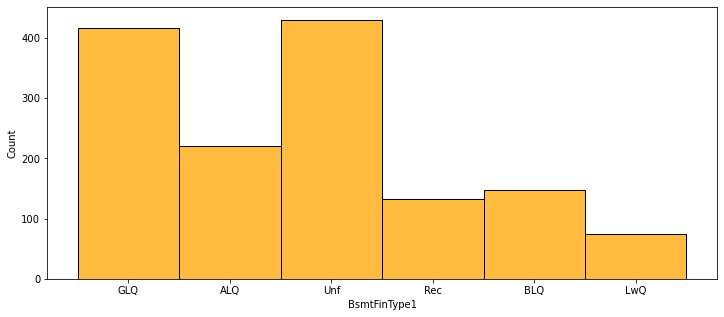

In [46]:
plt.figure(figsize = (12,5))
sns.histplot(x["BsmtFinType1"], bins = 50, color = "orange")

In [47]:
x["BsmtFinType1"] = x["BsmtFinType1"].fillna("None")

<AxesSubplot:xlabel='BsmtFinType2', ylabel='Count'>

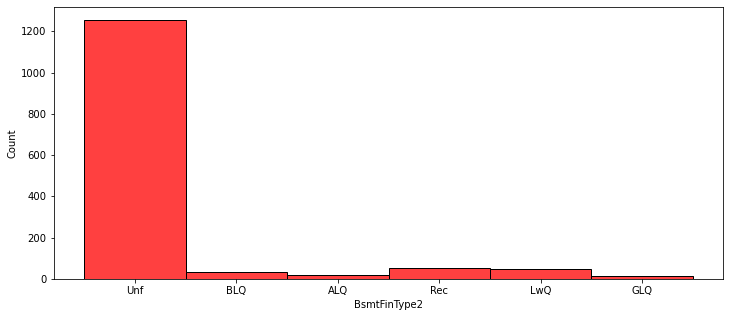

In [48]:
plt.figure(figsize = (12,5))
sns.histplot(x["BsmtFinType2"], bins = 50, color = "red")

In [49]:
x["BsmtFinType2"] = x["BsmtFinType2"].fillna("None")

<AxesSubplot:xlabel='Electrical', ylabel='Count'>

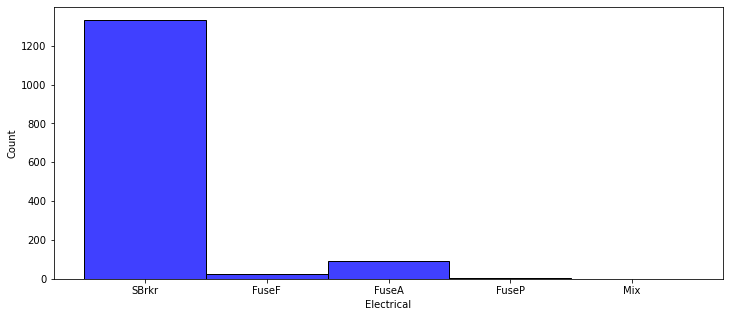

In [50]:
plt.figure(figsize = (12,5))
sns.histplot(x["Electrical"], bins = 50, color = "blue")

In [51]:
x.Electrical = x.Electrical.fillna(x.Electrical.mode().iloc[0])

<AxesSubplot:xlabel='FireplaceQu', ylabel='Count'>

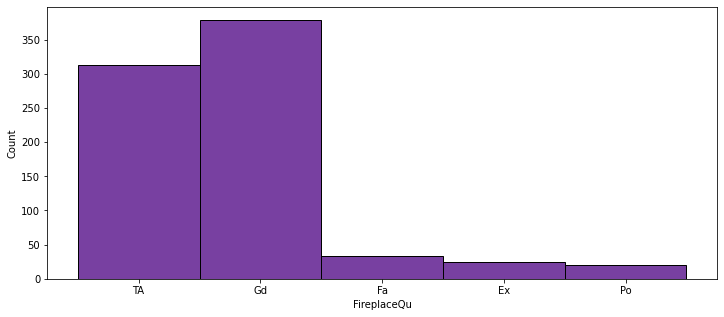

In [52]:
plt.figure(figsize = (12,5))
sns.histplot(x["FireplaceQu"], bins = 50, color = "indigo")

In [53]:
x["FireplaceQu"] = x["FireplaceQu"].fillna("None")

<AxesSubplot:xlabel='GarageType', ylabel='Count'>

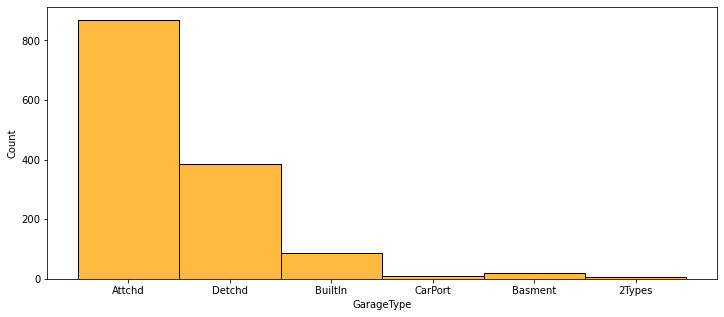

In [54]:
plt.figure(figsize = (12,5))
sns.histplot(x["GarageType"], bins = 50, color = "orange")

In [55]:
x["GarageType"] = x["GarageType"].fillna("None")

<AxesSubplot:xlabel='GarageFinish', ylabel='Count'>

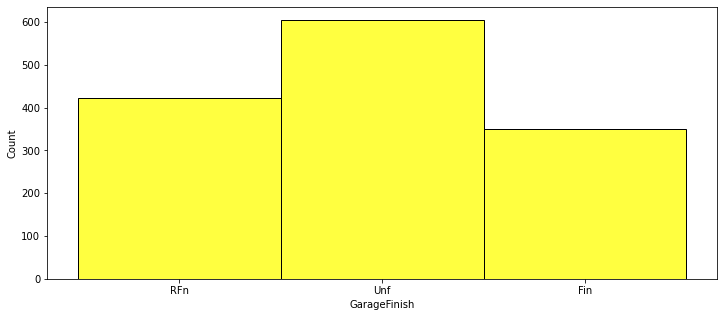

In [56]:
plt.figure(figsize = (12,5))
sns.histplot(x["GarageFinish"], bins = 50, color = "yellow")

In [57]:
x["GarageFinish"] = x["GarageFinish"].fillna("None")

<AxesSubplot:xlabel='GarageQual', ylabel='Count'>

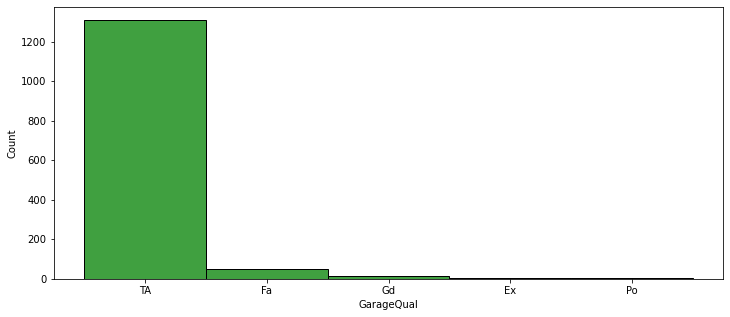

In [58]:
plt.figure(figsize = (12,5))
sns.histplot(x["GarageQual"], bins = 50, color = "green")

In [59]:
x["GarageQual"] = x["GarageQual"].fillna("None")

<AxesSubplot:xlabel='GarageCond', ylabel='Count'>

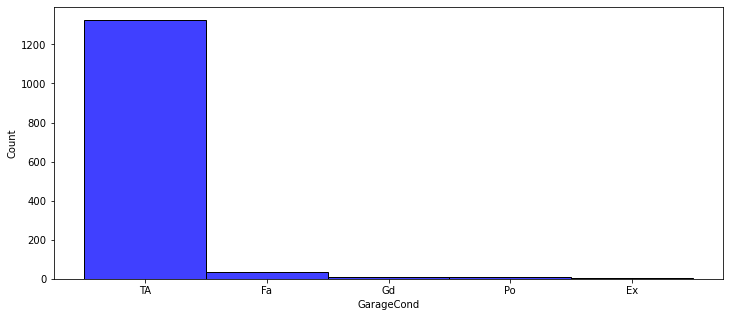

In [60]:
plt.figure(figsize = (12,5))
sns.histplot(x["GarageCond"], bins = 50, color = "blue")

In [61]:
x["GarageCond"] = x["GarageCond"].fillna("None")

In [62]:
print(x.isnull().sum().sum())
# Great! We have no missing data in our dataset

0


In [63]:
# Let's save this cleaned data 
x.to_csv("clean_house.csv", index = False)

In [64]:
X = pd.read_csv("clean_house.csv")

In [65]:
# Let's take a look at our cleaned data
X.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [66]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,0,0,0,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,0,0,0,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,0,0,0,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,0,0,0,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,0,0,0,250000


In [67]:
X["MSSubClass"] = X["MSSubClass"].apply(str)

In [68]:
X_numerical = X.select_dtypes(exclude = "object")
X_object = X.select_dtypes(include='object')

In [69]:
X_object = pd.get_dummies(X_object, drop_first = True)

In [70]:
X_final = pd.concat([X_numerical, X_object], axis = 1)

In [71]:
X_final.to_csv("housing_clean_anal.csv")

In [72]:
X = pd.read_csv("housing_clean_anal.csv")

In [73]:
x = X.drop("SalePrice", axis = 1)
y = X["SalePrice"]

In [74]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression()

In [75]:
lm.intercept_

-1081233.9613529933

In [76]:
lm.coef_

array([ 1.01542780e+00,  6.71740803e+01,  7.45373544e-01,  5.93295882e+03,
        5.80914508e+03,  4.05847713e+02,  1.19580225e+02,  2.12138736e+01,
        1.66847826e+01,  7.94079488e+00, -1.60432409e+00,  2.30211422e+01,
        1.63349369e+01,  3.46818938e+01, -2.06542514e+01,  3.03625051e+01,
        4.76649872e+02,  8.21656135e+01,  4.02687390e+03,  1.55587462e+03,
       -3.52460155e+03, -1.04954357e+04,  1.33071390e+03,  6.29381396e+03,
       -2.85396746e+01,  3.50075856e+03,  2.04848347e+01,  1.21014823e+01,
        1.05981040e+00,  5.56028458e+00,  3.17128441e+01,  2.63970081e+01,
        8.49363731e+01,  3.01036411e-02,  1.64231556e+02, -2.10922686e+03,
        2.04675295e+04,  1.27760659e+04,  1.69622198e+04,  1.61609223e+04,
        1.93479776e+03,  1.37609644e+04,  1.53010225e+04,  2.01755701e+04,
        1.22018394e+04, -2.93144839e+03,  5.12481556e+01, -1.86970971e+03,
        3.72786801e+04,  2.48363795e+04,  2.95424140e+04,  2.60650165e+04,
        2.89339262e+04,  

In [77]:
(y - y.mean()) / y.std()

0       0.346863
1       0.007103
2       0.535619
3      -0.515121
4       0.869087
          ...   
1454   -0.074691
1455    0.365739
1456    1.076718
1457   -0.488380
1458   -0.420743
Name: SalePrice, Length: 1459, dtype: float64

In [78]:
y_pred = lm.predict(x)

In [79]:
data_pred = pd.DataFrame(zip(y, y_pred), columns = ["actual", "predicted"])
data_pred.head()

,actual,predicted
0,208500,205617.737269
1,181500,207881.313135
2,223500,206876.932330
3,140000,166421.487159
4,250000,292947.699560


In [80]:
data_pred['error'] = data_pred["actual"] - data_pred["predicted"]
data_pred.head()

,actual,predicted,error
0,208500,205617.737269,2882.262731
1,181500,207881.313135,-26381.313135
2,223500,206876.932330,16623.067670
3,140000,166421.487159,-26421.487159
4,250000,292947.699560,-42947.699560


In [81]:
print("Mean Squared Error:", np.mean((y - y_pred)**2))
print("Root Mean Squared Error:", np.sqrt((y - y_pred)**2))

Mean Squared Error: 446195134.9734038
Root Mean Squared Error: 0        2882.262731
1       26381.313135
2       16623.067670
3       26421.487159
4       42947.699560
            ...     
1454     2666.031608
1455     2383.229257
1456    14639.247928
1457     3946.829006
1458     1933.856617
Name: SalePrice, Length: 1459, dtype: float64


In [82]:
print("R square: ",lm.score(x,y))

R square:  0.9292967051854386
